# Introduction

In this project I explore, segment, and cluster the neighborhoods in the city of Boston based upon the number of MBTA stops, methadone clinics, and halfway houses within each neighborhood. This project utilizes web scraping, Foursquare.com's API, and k-means clustering.

For the Boston neighborhood data, a webpage ("https://www.zip-codes.com/state/ma.asp") exists that has all the information needed to explore and cluster the neighborhoods in Boston. First, it's necessary to scrape the webpage and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format.

With the data in a structured format, I conduct the analysis to explore and cluster the neighborhoods in Boston.

### Import necessary libraries and extract from the website

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Listing of all Zip Codes in the state of Massachusetts
  </title>
  <meta content="List of all Zip Codes for the state of Massachusetts, MA. Includes all counties and cities in Massachusetts." name="description"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en-us" http-equiv="content-language"/>
  <meta content="index,follow" name="robots"/>
  <link href="https://www.zip-codes.com/state/ma.asp" rel="canonical"/>
  <link href="https://www.zip-codes.com/m/state/ma.asp" media="only screen and (max-width: 640px)" rel="alternate"/>
  <script async="" src="https://www.zip-codes.com/m/theme/ga/local-analytics.js">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments);}gtag('js', new Date());gtag('config', 'UA-23873959-1');
  </script>
  <script async="async" src="https://www.googletagservices.com/tag/js/
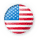

In [365]:
import requests
website_url = requests.get('https://www.zip-codes.com/state/ma.asp').text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

### By inspecting the output, it's evident that the data is availabe in "table" and belongs to class="statTable"

In [366]:
Table1 = soup.find('table',{'class':'statTable'})
Table1

<table border="0" cellpadding="0" cellspacing="0" class="statTable" id="tblZIP" title="All Massachusetts ZIP Codes, City, County, Classification, and Area Codes." width="99%">
<tr>
<td class="label" title="All ZIP Codes for Massachusetts"><strong>ZIP Code</strong></td>
<td class="info" title="The official city name as designated by the USPS."><strong>City</strong></td>
<td class="info" title="The primary county or parish this ZIP Code serves."><strong>County</strong></td>
<td class="info" title="The classification type of this ZIP Code."><strong>Type</strong></td>
</tr><tr><td><a href="/zip-code/01001/zip-code-01001.asp" title="ZIP Code 01001">ZIP Code 01001</a></td><td><a href="/city/ma-agawam.asp" title="Agawam, MA">Agawam</a></td><td><a href="/county/ma-hampden.asp">Hampden</a></td><td>Standard</td></tr><tr><td><a href="/zip-code/01002/zip-code-01002.asp" title="ZIP Code 01002">ZIP Code 01002</a></td><td><a href="/city/ma-amherst.asp" title="Amherst, MA">Amherst</a></td><td><a href=

In [367]:
print(Table1.tr.text)


ZIP Code
City
County
Type



In [368]:
headers="ZIP Code,City,County,Type"

In [369]:
Table2=""
for tr in Table1.find_all('tr'):
    row=""
    for tds in tr.find_all('td'):
        row=row+","+tds.text
    Table2=Table2+row[1:]+"\n"
print(Table2)

ZIP Code,City,County,Type
ZIP Code 01001,Agawam,Hampden,Standard
ZIP Code 01002,Amherst,Hampshire,Standard
ZIP Code 01003,Amherst,Hampshire,Standard
ZIP Code 01004,Amherst,Hampshire,P.O. Box
ZIP Code 01005,Barre,Worcester,Standard
ZIP Code 01007,Belchertown,Hampshire,Standard
ZIP Code 01008,Blandford,Hampden,Standard
ZIP Code 01009,Bondsville,Hampden,P.O. Box
ZIP Code 01010,Brimfield,Hampden,Standard
ZIP Code 01011,Chester,Hampden,Standard
ZIP Code 01012,Chesterfield,Hampshire,Standard
ZIP Code 01013,Chicopee,Hampden,Standard
ZIP Code 01014,Chicopee,Hampden,P.O. Box
ZIP Code 01020,Chicopee,Hampden,Standard
ZIP Code 01021,Chicopee,Hampden,P.O. Box
ZIP Code 01022,Chicopee,Hampden,Standard
ZIP Code 01026,Cummington,Hampshire,Standard
ZIP Code 01027,Easthampton,Hampshire,Standard
ZIP Code 01028,East Longmeadow,Hampden,Standard
ZIP Code 01029,East Otis,Berkshire,P.O. Box
ZIP Code 01030,Feeding Hills,Hampden,Standard
ZIP Code 01031,Gilbertville,Worcester,Standard
ZIP Code 01032,Goshen,Hampsh

In [370]:
file_Boston=open("Boston.csv","wb")
#file_Boston.write(bytes(headers,encoding="ascii",errors="ignore"))
file_Boston.write(bytes(Table2,encoding="ascii",errors="ignore"))

29402

In [371]:
import pandas as pd
Bos_Suffolk = pd.read_csv('Boston.csv',header=None)
Bos_Suffolk.columns=["ZIP Code","City","County","Type"]

Bos_Suffolk.head(10)

,ZIP Code,City,County,Type
0,ZIP Code,City,County,Type
1,ZIP Code 01001,Agawam,Hampden,Standard
2,ZIP Code 01002,Amherst,Hampshire,Standard
3,ZIP Code 01003,Amherst,Hampshire,Standard
4,ZIP Code 01004,Amherst,Hampshire,P.O. Box
5,ZIP Code 01005,Barre,Worcester,Standard
6,ZIP Code 01007,Belchertown,Hampshire,Standard
7,ZIP Code 01008,Blandford,Hampden,Standard
8,ZIP Code 01009,Bondsville,Hampden,P.O. Box
9,ZIP Code 01010,Brimfield,Hampden,Standard


In [372]:
del Bos_Suffolk['Type']
Bos_Suffolk.head(10)

,ZIP Code,City,County
0,ZIP Code,City,County
1,ZIP Code 01001,Agawam,Hampden
2,ZIP Code 01002,Amherst,Hampshire
3,ZIP Code 01003,Amherst,Hampshire
4,ZIP Code 01004,Amherst,Hampshire
5,ZIP Code 01005,Barre,Worcester
6,ZIP Code 01007,Belchertown,Hampshire
7,ZIP Code 01008,Blandford,Hampden
8,ZIP Code 01009,Bondsville,Hampden
9,ZIP Code 01010,Brimfield,Hampden


In [373]:
Suffolk = Bos_Suffolk[Bos_Suffolk['County'] == 'Suffolk'].reset_index(drop=True)
Suffolk.head(10)

,ZIP Code,City,County
0,ZIP Code 02108,Boston,Suffolk
1,ZIP Code 02109,Boston,Suffolk
2,ZIP Code 02110,Boston,Suffolk
3,ZIP Code 02111,Boston,Suffolk
4,ZIP Code 02112,Boston,Suffolk
5,ZIP Code 02113,Boston,Suffolk
6,ZIP Code 02114,Boston,Suffolk
7,ZIP Code 02115,Boston,Suffolk
8,ZIP Code 02116,Boston,Suffolk
9,ZIP Code 02117,Boston,Suffolk


In [374]:
Suffolk['ZIP Code'] = Suffolk['ZIP Code'].str.strip('ZIP Code')
Suffolk.head(10)

,ZIP Code,City,County
0,02108,Boston,Suffolk
1,02109,Boston,Suffolk
2,02110,Boston,Suffolk
3,02111,Boston,Suffolk
4,02112,Boston,Suffolk
5,02113,Boston,Suffolk
6,02114,Boston,Suffolk
7,02115,Boston,Suffolk
8,02116,Boston,Suffolk
9,02117,Boston,Suffolk


In [375]:
Suffolk = Suffolk.rename(columns={"ZIP Code": "ZIP"})
Suffolk.head(5)

,ZIP,City,County
0,02108,Boston,Suffolk
1,02109,Boston,Suffolk
2,02110,Boston,Suffolk
3,02111,Boston,Suffolk
4,02112,Boston,Suffolk


In [376]:
del Suffolk['County']
Suffolk.head(10)

,ZIP,City
0,02108,Boston
1,02109,Boston
2,02110,Boston
3,02111,Boston
4,02112,Boston
5,02113,Boston
6,02114,Boston
7,02115,Boston
8,02116,Boston
9,02117,Boston


In [377]:
Suffolk.dtypes

ZIP     object
City    object
dtype: object

In [378]:
Suffolk.head()

,ZIP,City
0,02108,Boston
1,02109,Boston
2,02110,Boston
3,02111,Boston
4,02112,Boston


### Someone was kind enough to create a .csv list of zip codes with coordinates on github. I use this to get the latitude and longitudes for each zip code.

In [379]:
coords=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data', dtype={'ZIP': str})
coords.head(5)

,ZIP,LAT,LNG
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135


In [380]:
coords.dtypes

ZIP     object
LAT    float64
LNG    float64
dtype: object

In [381]:
Boston = pd.merge(Suffolk, coords, on='ZIP')
Boston

,ZIP,City,LAT,LNG
0,02108,Boston,42.357768,-71.064858
1,02109,Boston,42.367032,-71.050493
2,02110,Boston,42.361962,-71.047846
3,02111,Boston,42.350518,-71.059077
4,02113,Boston,42.365331,-71.055233
5,02114,Boston,42.363174,-71.068646
6,02115,Boston,42.337105,-71.105696
7,02116,Boston,42.350579,-71.076397
8,02118,Boston,42.337582,-71.070482
9,02119,Roxbury,42.324029,-71.085017


### Install necessary libraries

In [382]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [383]:
address = 'Boston, MA'

geolocator = Nominatim(user_agent="Boston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [384]:
# Create map of Boston using latitude and longitude values
Boston_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to map
for ZIP, City, LAT, LNG in zip(Boston['ZIP'], Boston['City'], Boston['LAT'], Boston['LNG']):
    label = '{}, {}'.format(ZIP, City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [LAT, LNG],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Boston_map)  
    
Boston_map

### Define Foursquare Credentials and Version

In [385]:
CLIENT_ID = 'WZYT5YWOESAEIPU3WBWLQ5UYVUXC1OFKQXB1V4USLJUO5ITZ' # your Foursquare ID
CLIENT_SECRET = 'QZ355UJ3GDVVYU1FXA2CYTJC0H4BG4OZVDXRAJOHMQBIG2YF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WZYT5YWOESAEIPU3WBWLQ5UYVUXC1OFKQXB1V4USLJUO5ITZ
CLIENT_SECRET:QZ355UJ3GDVVYU1FXA2CYTJC0H4BG4OZVDXRAJOHMQBIG2YF


In [520]:
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=1000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['ZIP', 
                  'LAT', 
                  'LNG', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [521]:
#https://developer.foursquare.com/docs/resources/categories
# Emergency Room = 4bf58dd8d48988d194941735

Boston_venues1 = getNearbyVenues(names=Boston['ZIP'], latitudes=Boston['LAT'], longitudes=Boston['LNG'], 
                                categoryIds= '4bf58dd8d48988d194941735')
Boston_venues1

,ZIP,LAT,LNG,Venue,Venue Latitude,Venue Longitude,Venue Category
0,02108,42.357768,-71.064858,Massachusetts General Hospital ER,42.361169,-71.069001,Emergency Room
1,02111,42.350518,-71.059077,Tufts Medical Center Emergency Room,42.348913,-71.063374,Emergency Room
2,02111,42.350518,-71.059077,CITIDental High Street,42.353420,-71.057090,Dentist's Office
3,02114,42.363174,-71.068646,MGH Emergency Department,42.362579,-71.069209,Emergency Room
4,02114,42.363174,-71.068646,Mass General Hospital ER,42.363690,-71.068509,Emergency Room
5,02114,42.363174,-71.068646,Mass Eye And Ear ER,42.362578,-71.070306,Emergency Room
6,02114,42.363174,-71.068646,Massachusetts General Hospital ER,42.361169,-71.069001,Emergency Room
7,02114,42.363174,-71.068646,MGH urgent pod ED,42.363413,-71.069403,Emergency Room
8,02115,42.337105,-71.105696,Children's Hospital Boston ER,42.337739,-71.105615,Emergency Room
9,02115,42.337105,-71.105696,Brigham & Women's Emergency Department,42.336278,-71.106365,Emergency Room


In [522]:
Boston_venues1 = Boston_venues1.rename(columns={"Venue Category": "v_category", "Venue Latitude": "v_lat", "Venue Longitude": "v_lng"})
Boston_venues1.head(5)

,ZIP,LAT,LNG,Venue,v_lat,v_lng,v_category
0,02108,42.357768,-71.064858,Massachusetts General Hospital ER,42.361169,-71.069001,Emergency Room
1,02111,42.350518,-71.059077,Tufts Medical Center Emergency Room,42.348913,-71.063374,Emergency Room
2,02111,42.350518,-71.059077,CITIDental High Street,42.353420,-71.057090,Dentist's Office
3,02114,42.363174,-71.068646,MGH Emergency Department,42.362579,-71.069209,Emergency Room
4,02114,42.363174,-71.068646,Mass General Hospital ER,42.363690,-71.068509,Emergency Room


In [528]:
Boston_venues1.v_category.unique()

array(['Emergency Room', "Dentist's Office"], dtype=object)

In [532]:
Boston_ED = Boston_venues1[Boston_venues1['v_category'] == 'Emergency Room'].reset_index(drop=True)
Boston_ED

,ZIP,LAT,LNG,Venue,v_lat,v_lng,v_category
0,02108,42.357768,-71.064858,Massachusetts General Hospital ER,42.361169,-71.069001,Emergency Room
1,02111,42.350518,-71.059077,Tufts Medical Center Emergency Room,42.348913,-71.063374,Emergency Room
2,02114,42.363174,-71.068646,MGH Emergency Department,42.362579,-71.069209,Emergency Room
3,02114,42.363174,-71.068646,Mass General Hospital ER,42.363690,-71.068509,Emergency Room
4,02114,42.363174,-71.068646,Mass Eye And Ear ER,42.362578,-71.070306,Emergency Room
5,02114,42.363174,-71.068646,Massachusetts General Hospital ER,42.361169,-71.069001,Emergency Room
6,02114,42.363174,-71.068646,MGH urgent pod ED,42.363413,-71.069403,Emergency Room
7,02115,42.337105,-71.105696,Children's Hospital Boston ER,42.337739,-71.105615,Emergency Room
8,02115,42.337105,-71.105696,Brigham & Women's Emergency Department,42.336278,-71.106365,Emergency Room
9,02115,42.337105,-71.105696,BIDMC Ambulance Parking Lot,42.337463,-71.109737,Emergency Room


In [533]:
Boston_ED = Boston_ED.drop([2,3,4,5,6,9,11,12,13,14,16,17,19,20], axis=0)
Boston_ED

,ZIP,LAT,LNG,Venue,v_lat,v_lng,v_category
0,02108,42.357768,-71.064858,Massachusetts General Hospital ER,42.361169,-71.069001,Emergency Room
1,02111,42.350518,-71.059077,Tufts Medical Center Emergency Room,42.348913,-71.063374,Emergency Room
7,02115,42.337105,-71.105696,Children's Hospital Boston ER,42.337739,-71.105615,Emergency Room
8,02115,42.337105,-71.105696,Brigham & Women's Emergency Department,42.336278,-71.106365,Emergency Room
10,02115,42.337105,-71.105696,Beth Israel Deaconess Emergency Room,42.337966,-71.109540,Emergency Room
15,02118,42.337582,-71.070482,Boston Medical Center ER,42.334162,-71.072609,Emergency Room
18,02135,42.349688,-71.153964,St Elizabeth's Emergency Department,42.348767,-71.149868,Emergency Room


In [538]:
Boston_ED.groupby('ZIP').count()

,LAT,LNG,Venue,v_lat,v_lng,v_category
ZIP,,,,,,
02108,1,1,1,1,1,1
02111,1,1,1,1,1,1
02115,3,3,3,3,3,3
02118,1,1,1,1,1,1
02135,1,1,1,1,1,1


In [575]:
Boston_tx=pd.read_csv('https://raw.githubusercontent.com/NBrisbon/Coursera_Capstone/master/Treatment_Bos.csv', dtype={'ZIP': str})
Boston_tx.columns=['ZIP','LAT','LNG','Venue','v_lat','v_lng','v_category']
Boston_tx

,ZIP,LAT,LNG,Venue,v_lat,v_lng,v_category
0,02119,42.324029,-71.064858,Hope House,42.330585,-71.074463,Halfway House
1,02116,42.350579,-71.076397,Men & Women's Sober Living & Recovery House,42.352383,-71.064130,Halfway House
2,02127,42.334992,-71.039093,Cushing House,42.336591,-71.055968,Halfway House
3,02127,42.334992,-71.039093,Answer House,42.336187,-71.044349,Halfway House
4,02130,42.309174,-71.113835,Sullivan House,42.308332,-71.101316,Halfway House
5,02130,42.309174,-71.113835,Portis Family Home,42.325400,-71.111755,Halfway House
6,02128,42.361129,-71.006975,Sober Surroundings,42.381283,-71.033295,Halfway House
7,02125,42.315682,-71.055555,Sheperd House,42.314215,-71.062408,Halfway House
8,02119,42.324029,-71.064858,Latinas Y Ninos Center,42.326466,-71.074661,Halfway House
9,02134,42.358016,-71.128608,Granada House,42.358118,-71.134121,Halfway House


In [576]:
Boston_tx.dtypes

ZIP            object
LAT           float64
LNG           float64
Venue          object
v_lat         float64
v_lng         float64
v_category     object
dtype: object

In [571]:
Boston_ED.dtypes

ZIP            object
LAT           float64
LNG           float64
Venue          object
v_lat         float64
v_lng         float64
v_category     object
dtype: object

In [580]:
Boston_final = pd.concat([Boston_tx, Boston_ED], ignore_index=True)
Boston_final

,ZIP,LAT,LNG,Venue,v_lat,v_lng,v_category
0,02119,42.324029,-71.064858,Hope House,42.330585,-71.074463,Halfway House
1,02116,42.350579,-71.076397,Men & Women's Sober Living & Recovery House,42.352383,-71.064130,Halfway House
2,02127,42.334992,-71.039093,Cushing House,42.336591,-71.055968,Halfway House
3,02127,42.334992,-71.039093,Answer House,42.336187,-71.044349,Halfway House
4,02130,42.309174,-71.113835,Sullivan House,42.308332,-71.101316,Halfway House
5,02130,42.309174,-71.113835,Portis Family Home,42.325400,-71.111755,Halfway House
6,02128,42.361129,-71.006975,Sober Surroundings,42.381283,-71.033295,Halfway House
7,02125,42.315682,-71.055555,Sheperd House,42.314215,-71.062408,Halfway House
8,02119,42.324029,-71.064858,Latinas Y Ninos Center,42.326466,-71.074661,Halfway House
9,02134,42.358016,-71.128608,Granada House,42.358118,-71.134121,Halfway House


In [581]:
print("Boston_ED dimensions: {}".format(Boston_ED.shape))
print("Boston_tx dimensions: {}".format(Boston_tx.shape))
print("Boston_final dimensions: {}".format(Boston_final.shape))

Boston_ED dimensions: (7, 7)
Boston_tx dimensions: (38, 7)
Boston_final dimensions: (45, 7)


In [583]:
# one hot encoding
Boston_onehot = pd.get_dummies(Boston_final[['v_category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Boston_onehot['ZIP'] = Boston_final['ZIP'] 

# move neighborhood column to the first column
fixed_columns = [Boston_onehot.columns[-1]] + list(Boston_onehot.columns[:-1])
Boston_onehot = Boston_onehot[fixed_columns]

Boston_onehot

,ZIP,ATS,CSS,Emergency Room,Halfway House,MAT,TSS
0,02119,0,0,0,1,0,0
1,02116,0,0,0,1,0,0
2,02127,0,0,0,1,0,0
3,02127,0,0,0,1,0,0
4,02130,0,0,0,1,0,0
5,02130,0,0,0,1,0,0
6,02128,0,0,0,1,0,0
7,02125,0,0,0,1,0,0
8,02119,0,0,0,1,0,0
9,02134,0,0,0,1,0,0


In [584]:
Boston_onehot.shape

(45, 7)

In [585]:
Boston_grouped = Boston_onehot.groupby('ZIP').mean().reset_index()
Boston_grouped

,ZIP,ATS,CSS,Emergency Room,Halfway House,MAT,TSS
0,02108,0.000000,0.00,1.000000,0.000000,0.000000,0.000000
1,02111,0.000000,0.00,1.000000,0.000000,0.000000,0.000000
2,02114,0.000000,0.00,0.000000,0.000000,1.000000,0.000000
3,02115,0.000000,0.00,1.000000,0.000000,0.000000,0.000000
4,02116,0.000000,0.00,0.000000,1.000000,0.000000,0.000000
5,02118,0.125000,0.00,0.125000,0.375000,0.375000,0.000000
6,02119,0.250000,0.25,0.000000,0.500000,0.000000,0.000000
7,02122,0.000000,0.00,0.000000,1.000000,0.000000,0.000000
8,02124,0.000000,0.00,0.000000,1.000000,0.000000,0.000000
9,02125,0.000000,0.00,0.000000,0.666667,0.000000,0.333333


In [586]:
Boston_grouped.shape

(17, 7)

In [587]:
num_top_venues = 6

for hood in Boston_grouped['ZIP']:
    print("----"+hood+"----")
    temp = Boston_grouped[Boston_grouped['ZIP'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----02108----
            venue  freq
0  Emergency Room   1.0
1             ATS   0.0
2             CSS   0.0
3   Halfway House   0.0
4             MAT   0.0
5             TSS   0.0


----02111----
            venue  freq
0  Emergency Room   1.0
1             ATS   0.0
2             CSS   0.0
3   Halfway House   0.0
4             MAT   0.0
5             TSS   0.0


----02114----
            venue  freq
0             MAT   1.0
1             ATS   0.0
2             CSS   0.0
3  Emergency Room   0.0
4   Halfway House   0.0
5             TSS   0.0


----02115----
            venue  freq
0  Emergency Room   1.0
1             ATS   0.0
2             CSS   0.0
3   Halfway House   0.0
4             MAT   0.0
5             TSS   0.0


----02116----
            venue  freq
0   Halfway House   1.0
1             ATS   0.0
2             CSS   0.0
3  Emergency Room   0.0
4             MAT   0.0
5             TSS   0.0


----02118----
            venue  freq
0   Halfway House  0.38
1             MAT 

In [664]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [665]:
num_top_venues = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZIP']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['ZIP'] = Boston_grouped['ZIP']

for ind in np.arange(Boston_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(Boston_grouped.iloc[ind, :], num_top_venues)

venues_sorted

,ZIP,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,02108,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
1,02111,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
2,02114,MAT,TSS,Halfway House,Emergency Room,CSS,ATS
3,02115,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
4,02116,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
5,02118,MAT,Halfway House,Emergency Room,ATS,TSS,CSS
6,02119,Halfway House,CSS,ATS,TSS,MAT,Emergency Room
7,02122,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
8,02124,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
9,02125,Halfway House,TSS,MAT,Emergency Room,CSS,ATS


In [666]:
# set number of clusters
kclusters = 6

Boston_grouped_clustering = Boston_grouped.drop('ZIP', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 3, 2, 5, 0, 0, 5, 5, 4])

In [667]:
# add clustering labels
venues_sorted.insert(0, 'Cluster', kmeans.labels_)

Boston_merged = Boston

# merge DownT_grouped with toronto_data to add latitude/longitude for each neighborhood
Boston_merged = Boston_merged.join(venues_sorted.set_index('ZIP'), on='ZIP')

Boston_merged.head(20) # check the last columns!

,ZIP,City,LAT,LNG,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,02108,Boston,42.357768,-71.064858,2.0,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
1,02109,Boston,42.367032,-71.050493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02110,Boston,42.361962,-71.047846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02111,Boston,42.350518,-71.059077,2.0,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
4,02113,Boston,42.365331,-71.055233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,02114,Boston,42.363174,-71.068646,3.0,MAT,TSS,Halfway House,Emergency Room,CSS,ATS
6,02115,Boston,42.337105,-71.105696,2.0,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
7,02116,Boston,42.350579,-71.076397,5.0,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
8,02118,Boston,42.337582,-71.070482,0.0,MAT,Halfway House,Emergency Room,ATS,TSS,CSS
9,02119,Roxbury,42.324029,-71.085017,0.0,Halfway House,CSS,ATS,TSS,MAT,Emergency Room


In [668]:
Boston_merged.dtypes

ZIP                       object
City                      object
LAT                      float64
LNG                      float64
Cluster                  float64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
dtype: object

In [669]:
Boston_kmeans=Boston_merged.dropna()

In [670]:
Boston_kmeans

,ZIP,City,LAT,LNG,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,02108,Boston,42.357768,-71.064858,2.0,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
3,02111,Boston,42.350518,-71.059077,2.0,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
5,02114,Boston,42.363174,-71.068646,3.0,MAT,TSS,Halfway House,Emergency Room,CSS,ATS
6,02115,Boston,42.337105,-71.105696,2.0,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
7,02116,Boston,42.350579,-71.076397,5.0,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
8,02118,Boston,42.337582,-71.070482,0.0,MAT,Halfway House,Emergency Room,ATS,TSS,CSS
9,02119,Roxbury,42.324029,-71.085017,0.0,Halfway House,CSS,ATS,TSS,MAT,Emergency Room
12,02122,Dorchester,42.291413,-71.042158,5.0,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
13,02124,Dorchester Center,42.285805,-71.070571,5.0,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
14,02125,Dorchester,42.315682,-71.055555,4.0,Halfway House,TSS,MAT,Emergency Room,CSS,ATS


In [671]:
Boston_kmeans.dtypes

ZIP                       object
City                      object
LAT                      float64
LNG                      float64
Cluster                  float64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
dtype: object

In [673]:
Boston_kmeans.Cluster = Boston_kmeans.Cluster.astype(object)

In [674]:
Boston_kmeans.Cluster = Boston_kmeans.Cluster.astype(int)

In [683]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Boston_kmeans['LAT'], Boston_kmeans['LNG'], Boston_kmeans['ZIP'], Boston_kmeans['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [676]:
Boston_kmeans.loc[Boston_kmeans['Cluster'] == 0, Boston_kmeans.columns[[1] + list(range(5, Boston_kmeans.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
8,Boston,MAT,Halfway House,Emergency Room,ATS,TSS,CSS
9,Roxbury,Halfway House,CSS,ATS,TSS,MAT,Emergency Room
17,East Boston,Halfway House,MAT,TSS,Emergency Room,CSS,ATS


In [677]:
Boston_kmeans.loc[Boston_kmeans['Cluster'] == 1, Boston_kmeans.columns[[1] + list(range(5, Boston_kmeans.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
19,Jamaica Plain,ATS,Halfway House,MAT,TSS,Emergency Room,CSS
23,Brighton,MAT,Emergency Room,ATS,TSS,Halfway House,CSS


In [678]:
Boston_kmeans.loc[Boston_kmeans['Cluster'] == 2, Boston_kmeans.columns[[1] + list(range(5, Boston_kmeans.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Boston,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
3,Boston,Emergency Room,TSS,MAT,Halfway House,CSS,ATS
6,Boston,Emergency Room,TSS,MAT,Halfway House,CSS,ATS


In [679]:
Boston_kmeans.loc[Boston_kmeans['Cluster'] == 3, Boston_kmeans.columns[[1] + list(range(5, Boston_kmeans.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
5,Boston,MAT,TSS,Halfway House,Emergency Room,CSS,ATS
25,Chelsea,MAT,TSS,Halfway House,Emergency Room,CSS,ATS


In [680]:
Boston_kmeans.loc[Boston_kmeans['Cluster'] == 4, Boston_kmeans.columns[[1] + list(range(5, Boston_kmeans.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
14,Dorchester,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
15,Mattapan,TSS,Halfway House,MAT,Emergency Room,CSS,ATS


In [681]:
Boston_kmeans.loc[Boston_kmeans['Cluster'] == 5, Boston_kmeans.columns[[1] + list(range(5, Boston_kmeans.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
7,Boston,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
12,Dorchester,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
13,Dorchester Center,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
16,South Boston,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
22,Allston,Halfway House,TSS,MAT,Emergency Room,CSS,ATS
